This is Will's edit of a notebook originally written by Javier.

# Correlations between H II region parameters

We look at correlations between 6 principal measurements that fall into two groups: 

* Basic parameters: 
    * Size: $L$
    * Ionizing luminosity: $Q(\mathrm{H})$
    * Distance: $D$
* Velocity structure function parameters:
    * Velocity dispersion on plane of sky: $\sigma$
    * Velocity autocorrelation length scale: $\ell_0$
    * Structure function slope in inertial range: $m$

Colab's markdown renderer seems to have a bug that requires some math outside of a list in order to trigger latex parsing: $\alpha$. 

## Original table from Javier

In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import lmfit
import statsmodels.api as sm
import linmix
from scipy.stats import pearsonr
import pickle

In [2]:
Region =["NGC 604","NGC 595","Hubble X","Hubble V","30Dor" ,"Carina","NGC 346","M8"   ,"OrionL","OrionS"]
LHa    =[4.46e39  ,2.29e39  ,3.98e38   ,7.41e38   ,5.74e39 ,3.98e39 ,4.67e38  ,2.95e37,1e37    ,1e37    ]
SFR    =[5.3e-3   ,2.6e-3   ,3.1e-4    ,1.5e-4    ,1.3e-2  ,1.0e-2  ,0.0021   ,1.0e-4 ,5.3e-5  ,5.3e-5  ]
n      =[3        ,4        ,5         ,8         ,250     ,500     ,100      ,60     ,150     ,4000    ] 
Diam   =[400      ,400      ,160       ,130       ,98.9    ,5       ,64       , 25    ,5       ,0.6     ]
R      =[200      ,200      ,80        ,65        ,49.4    ,7.5     ,32       ,12.5   ,2.5     ,0.3     ]
Dist   =[840      ,840      ,500       ,500       ,50      ,2.35    ,61.7     ,1.25   ,0.4     ,0.4     ]
siglos =[16.21    ,18.33    ,12.3      ,13.4      ,31.7    ,22.46   ,10.2     ,13.6   ,6       ,6       ]
sigW   =[23.1     ,27.1     ,13.4      ,14.7      ,31.7    ,22.46   ,10.2     ,13.6   ,6       ,6       ]

In [3]:
samples=pd.read_csv('CIresults//list2.csv',header=None)
samples

,0
0,N604H
1,N595
2,HX
3,HV
4,Dor
5,CarC
6,N346
7,M8
8,OrionLH
9,OrionS


In [4]:
CI = {}

for i in range(len(samples)):
    pickle_in = open('CIresults//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    CI[samples[0][i]] = df

SF = {}

for i in range(len(samples)):
    pickle_in = open('SFresults//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    SF[samples[0][i]] = df

Reults

In [5]:
sig = [[0]*(1) for i in range(len(samples))]
siger = [[0]*(1) for i in range(len(samples))]
sig2 = [[0]*(1) for i in range(len(samples))]
sig2er = [[0]*(1) for i in range(len(samples))]
r0 = [[0]*(1) for i in range(len(samples))]
r0er = [[0]*(1) for i in range(len(samples))]
m = [[0]*(1) for i in range(len(samples))]
mer = [[0]*(1) for i in range(len(samples))]

for i in range(len(samples)):
    sig2[i] = np.round(CI[samples[0][i]]['resultCI'].params['sig2'].value,4)
    r0[i] = np.round(CI[samples[0][i]]['resultCI'].params['r0'].value,4)
    m[i] = np.round(CI[samples[0][i]]['resultCI'].params['m'].value,4)
    siger[i] = np.round(CI[samples[0][i]]['resultCI'].params['sig2'].stderr,4)
    r0er[i] = np.round(CI[samples[0][i]]['resultCI'].params['r0'].stderr,4)
    mer[i] = np.round(CI[samples[0][i]]['resultCI'].params['m'].stderr,4)
  

In [6]:
sig = np.array(sig2)**0.5
siger = np.array(sig2er)**0.5

In [7]:
data = pd.DataFrame(
    {
       "Region": Region,
       "LHa": LHa,
       "SFR": SFR,
       "n": n,
       "L [pc]": Diam,
       "R [pc]": R,
       "Dist [kpc]": Dist,
       "sig2 [km/s]": sig2,
       "sig2er": sig2,
       "sig [km/s]": sig2,
       "siger": sig2,
       "m": m,
       "mer": mer,
       "r0 [pc]": r0,
       "r0er": r0er,
       "siglos [km/s]": siglos,
      
    },
)

Checar que los tipos de las columnas sean adecuadas:

In [8]:
data.dtypes

Region            object
LHa              float64
SFR              float64
n                  int64
L [pc]           float64
R [pc]           float64
Dist [kpc]       float64
sig2 [km/s]      float64
sig2er           float64
sig [km/s]       float64
siger            float64
m                float64
mer              float64
r0 [pc]          float64
r0er             float64
siglos [km/s]    float64
dtype: object

In [9]:
data

,Region,LHa,SFR,n,L [pc],R [pc],Dist [kpc],sig2 [km/s],sig2er,sig [km/s],siger,m,mer,r0 [pc],r0er,siglos [km/s]
0,NGC 604,4.460000e+39,0.005300,3,400.0,200.0,840.00,45.2234,45.2234,45.2234,45.2234,1.4722,0.1472,6.4295,0.6430,16.21
1,NGC 595,2.290000e+39,0.002600,4,400.0,200.0,840.00,40.3020,40.3020,40.3020,40.3020,1.3895,0.2441,7.5253,0.6392,18.33
2,Hubble X,3.980000e+38,0.000310,5,160.0,80.0,500.00,13.1909,13.1909,13.1909,13.1909,1.1243,0.1336,3.2641,0.2352,12.30
3,Hubble V,7.410000e+38,0.000150,8,130.0,65.0,500.00,8.7515,8.7515,8.7515,8.7515,0.9233,0.3350,2.2742,0.9619,13.40
4,30Dor,5.740000e+39,0.013000,250,98.9,49.4,50.00,301.1711,301.1711,301.1711,301.1711,0.8942,0.0894,3.6167,0.3617,31.70
5,Carina,3.980000e+39,0.010000,500,5.0,7.5,2.35,18.5898,18.5898,18.5898,18.5898,0.8607,0.7832,0.3937,0.1882,22.46
6,NGC 346,4.670000e+38,0.002100,100,64.0,32.0,61.70,37.4952,37.4952,37.4952,37.4952,0.7522,0.0395,1.7526,0.1858,10.20
7,M8,2.950000e+37,0.000100,60,25.0,12.5,1.25,6.7290,6.7290,6.7290,6.7290,1.2284,0.1228,0.8661,0.0866,13.60
8,OrionL,1.000000e+37,0.000053,150,5.0,2.5,0.40,13.7171,13.7171,13.7171,13.7171,0.9253,4.3414,0.8170,4.4627,6.00
9,OrionS,1.000000e+37,0.000053,4000,0.6,0.3,0.40,9.1787,9.1787,9.1787,9.1787,1.1361,0.1136,0.0405,0.0041,6.00


## Change to log scale for most parameters

El analisis de la mayoría de las columnas sería mejor en escala logarítmica porque varían por varios ordenes de magnitud.  Entonces, hacemos una nueva versión de la tabla así. Dejamos la $m$ en escala lineal porque no varía mucho.

In [10]:
cols = data.columns
logdata = data.copy()
for col in cols:
    if col not in ["Region", "m", "mer", "r0er", "siger",  "sig2er",]:
        logdata[col] = np.round(np.log10(logdata[col]), 2)
        logdata.rename(columns={col: f"log {col}"}, inplace=True)
# Some minor changes to column names
logdata.rename(
    columns={
        "log LHa": "log L(H) [erg s^-1]",
        }, 
    inplace=True)
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig2 [km/s],sig2er,log sig [km/s],siger,m,mer,log r0 [pc],r0er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,1.66,45.2234,1.66,45.2234,1.4722,0.1472,0.81,0.6430,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,1.61,40.3020,1.61,40.3020,1.3895,0.2441,0.88,0.6392,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,1.12,13.1909,1.12,13.1909,1.1243,0.1336,0.51,0.2352,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.94,8.7515,0.94,8.7515,0.9233,0.3350,0.36,0.9619,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,2.48,301.1711,2.48,301.1711,0.8942,0.0894,0.56,0.3617,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,1.27,18.5898,1.27,18.5898,0.8607,0.7832,-0.40,0.1882,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,1.57,37.4952,1.57,37.4952,0.7522,0.0395,0.24,0.1858,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.83,6.7290,0.83,6.7290,1.2284,0.1228,-0.06,0.0866,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,1.14,13.7171,1.14,13.7171,0.9253,4.3414,-0.09,4.4627,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.96,9.1787,0.96,9.1787,1.1361,0.1136,-1.39,0.0041,0.78


Uncertainties Log Space

In [11]:
logdata['mer']=(data['mer']/data['m'])*0.434

In [12]:
logdata['r0er']=(data['r0er']/data['r0 [pc]'])*0.434

In [13]:
logdata['siger']=(data['siger']/data['sig [km/s]'])*0.434

Make the label text bigger on the figures

In [14]:
sns.set_context("talk")

Repeat the pair plot of correlations between columns with the log-scale quantities. Use color to indicate the distance to the regions.

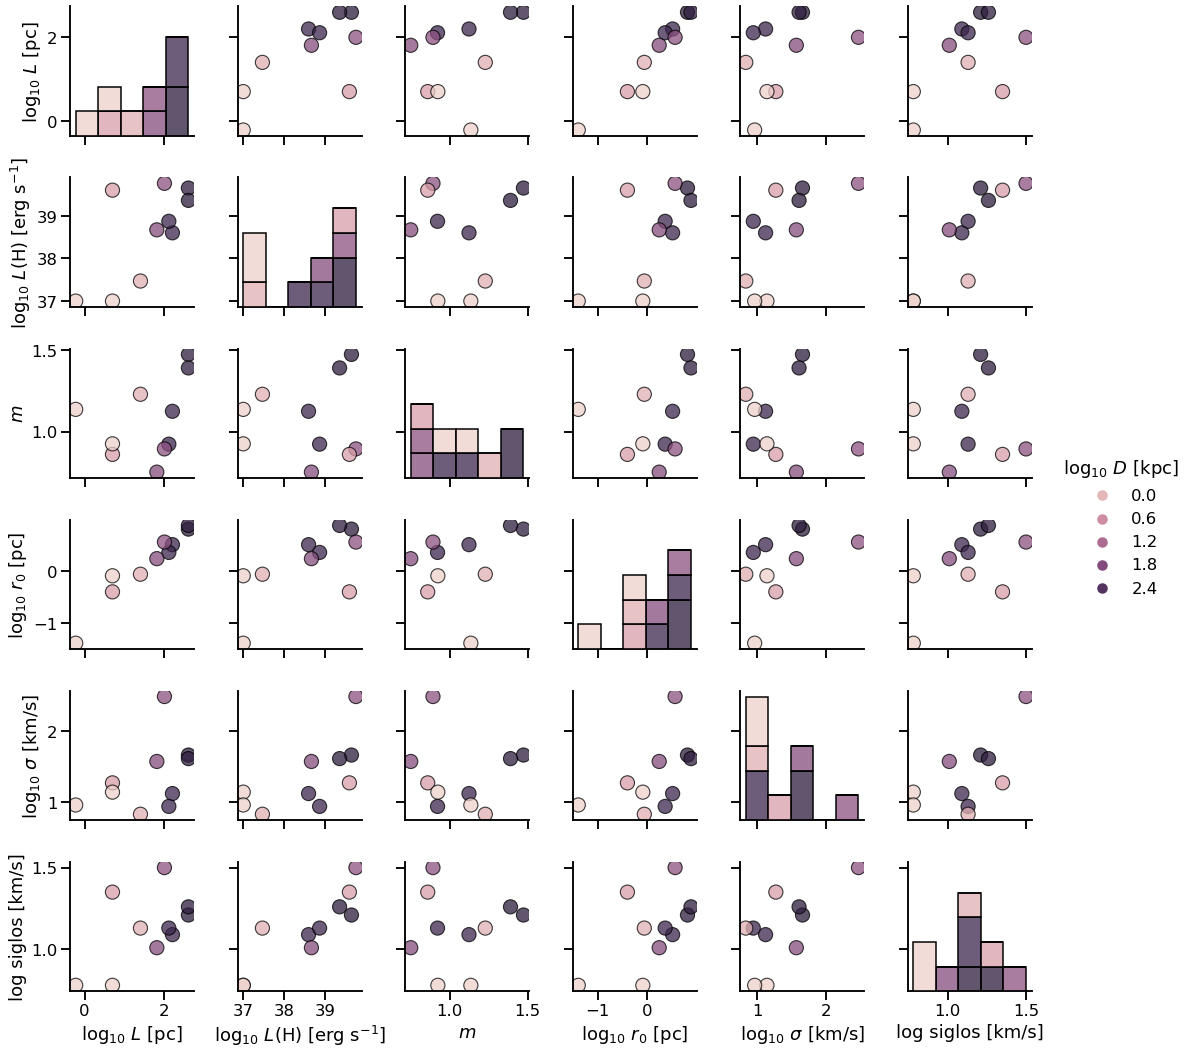

In [15]:
selected_vars = [ "log L [pc]","log L(H) [erg s^-1]", "log Dist [kpc]", "m", "log r0 [pc]", "log sig [km/s]", "log siglos [km/s]"]
plotdata = logdata[selected_vars].rename(
    columns={
        # Switch column names to use latex formatting to improve axis labels
        "log L [pc]": r"$\log_{10}\ L$ [pc]", 
        "log L(H) [erg s^-1]": r"$\log_{10}\ L(\mathrm{H})$ [erg s$^{-1}$]", 
        "m": "$m$", 
        "log r0 [pc]": r"$\log_{10}\ r_0$ [pc]", 
        "log sig [km/s]": r"$\log_{10}\ \sigma$ [km/s]", 
        "log Dist [kpc]": r"$\log_{10}\ D$ [kpc]",
    },
)

sns.pairplot(plotdata, 
             hue=r"$\log_{10}\ D$ [kpc]",
             plot_kws=dict(alpha=0.75, s=200, edgecolor="k"), 
             diag_kind='hist',
             diag_kws= dict(multiple='stack'),
             );

figname = "strucfunc-correlations"
# Save PDF and JPG versions of the figure
#plt.gcf().savefig(f"{figname}.pdf")
#plt.gcf().savefig(f"{figname}.jpg")

## Correlation coefficients

Calculate [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), $r$, between each pair of variables:

In [16]:
logdata[selected_vars].corr()

,log L [pc],log L(H) [erg s^-1],log Dist [kpc],m,log r0 [pc],log sig [km/s],log siglos [km/s]
log L [pc],1.000000,0.674686,0.923364,0.354092,0.964941,0.435600,0.555372
log L(H) [erg s^-1],0.674686,1.000000,0.714755,0.058873,0.659152,0.669803,0.875549
log Dist [kpc],0.923364,0.714755,1.000000,0.317367,0.834975,0.371716,0.477683
m,0.354092,0.058873,0.317367,1.000000,0.276737,-0.070054,0.053185
log r0 [pc],0.964941,0.659152,0.834975,0.276737,1.000000,0.506351,0.559702
log sig [km/s],0.435600,0.669803,0.371716,-0.070054,0.506351,1.000000,0.644674
log siglos [km/s],0.555372,0.875549,0.477683,0.053185,0.559702,0.644674,1.000000


So the results for correlations between the basic parameters are what we would expect:

- Size is moderately correlated with luminosity ($r = 0.67$).  The correlation is only weak because size will also depend on ambient density and the age of the region. 
- Size is highly correlated with distance ($r = 0.92$).  This is just a selection effect due to the fact that we tend to choose regions that have an angular size that matches our instruments. 
- Luminosity–distance correlation is the weakest ($r = 0.71$), and can be explained as being due to the previous two.



The correlations of the structure function parameters with the basic parameters are very interesting:
- Autocorrelation length scale, $r_0$, is *highly* correlated ($r = 0.96$) with region size, $L$.  Looking at the graph, the relation seems to be approximately linear with $\ell_0 \approx 0.1 L$.  How much of this correlation is real and how much is down to selection effects is something we need to consider carefully.
- Velocity dispersion, $\sigma$, is well correlated ($r = 0.71$) with luminosity, $L(\mathrm{Ha})$.  
- The structure function slope $m$ is well correlated ($r = 0.73$) with distance.  This is mainly because $m \approx 1.6$ for all the distant regions observed with TAURUS and ISIS, but is around $m = 1$ for all the nearby regions.  I suspect that this is mainly a data quality issue: we observe very little of the inertial range in the distant regions, so the determination of $m$ is probably not so reliable.  But I am not sure why this would tend to bias $m$ towards high values.  

## Significance tests

We can calculate the statistical significance of the correlations by using the Student t-statistic.  We test the null hypothesis that a given pair of variables is truly uncorrelated ($r = 0$) for the underlying population and that the observed $r$ for our sample of $N = 9$ sources arises solely by chance.  We want to calculate the $p$-value, which is the probability of obtaining $r$ greater than or equal to the observed value, given that there is no true correlation.  A small value of $p$ means that the null hypothesis can be rejected at a certain confidence level.  

First we calculate the t-statistic from the Pearson correlation coefficient:
$$
t = r \, \left(\frac{N - 2}{1 - r^2}\right)^{1/2}
$$
Then, we use the cumulative distribution function (CDF) of the t-distribution with $N - 1$ degrees of freedom to find the p-value. 

In [17]:
def tstatistic(r, n):
    """Compute Student t statistic for null hypothesis of no correlation
    for an observed Pearson correlation of `r` from `n` samples
    """
    return r*np.sqrt((n - 2) / (1 - r**2))

In [18]:
import scipy.stats

In [19]:
def p_from_t(t, n):
    """Compute 1-sided p-value from Student statistic `t` with `n` observations"""
    # sf is survival function: 1 - CDF
    return scipy.stats.t.sf(t, n-1)
    

In [20]:
N = 9
rvals = np.array([0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.779, 0.8, 0.9, 0.908, 0.95, 0.981])
tvals = tstatistic(rvals, N)
pvals = p_from_t(tvals, N)
pd.DataFrame(
    {"r": rvals, "t": tvals, "p": pvals}
)

,r,t,p
0,0.000,0.000000,5.000000e-01
1,0.200,0.540062,3.019294e-01
2,0.400,1.154701,1.407685e-01
3,0.500,1.527525,8.257494e-02
4,0.600,1.984313,4.124805e-02
5,0.700,2.593355,1.597303e-02
6,0.779,3.287020,5.535582e-03
7,0.800,3.527668,3.879201e-03
8,0.900,5.462793,2.997718e-04
9,0.908,5.733922,2.184923e-04


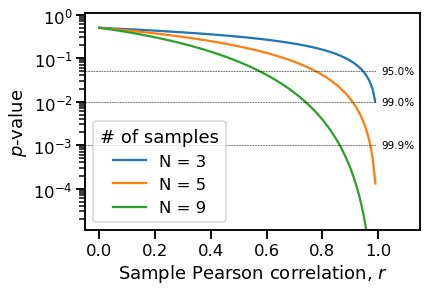

In [21]:
fig, ax = plt.subplots()
for N in 3, 5, 9:
    rvals = np.linspace(0.0, 1.0, 100, endpoint=False)
    tvals = tstatistic(rvals, N)
    pvals = p_from_t(tvals, N)
    ax.plot(rvals, pvals, label=f"N = {N}")
for p0 in 0.05, 0.01, 0.001:
    ax.axhline(p0, color="k", ls="--", lw=0.5)
    ax.text(1.07, p0, f"{100*(1-p0):.1f}%", 
            va="center", ha="center", fontsize="xx-small", 
            bbox={"color": "w"})
ax.legend(title="# of samples")
ax.set(
    xlabel="Sample Pearson correlation, $r$",
    ylabel="$p$-value",
    yscale="log",
    xlim=[-0.05, 1.15],
    ylim=[1.1e-5, 1.1],
);

I have marked confidence levels for nominal $p$-values of 0.05, 0.01, and 0.001, which are often used to judge significance.   This implies that all the correlations that we listed above are highly significant.  For instance, the correlation of $\sigma$ with luminosity, with $r=0.77$, has $p = 0.011$, so close to the 99% confidence level. 

Despite the good correlation, there is a factor of 4 difference in $\sigma$ between Carina and 30~Dor, despite similar luminosities.  **Need to check these luminostiy values**. 

In [22]:
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig2 [km/s],sig2er,log sig [km/s],siger,m,mer,log r0 [pc],r0er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,1.66,45.2234,1.66,0.434,1.4722,0.043394,0.81,0.043403,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,1.61,40.3020,1.61,0.434,1.3895,0.076243,0.88,0.036864,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,1.12,13.1909,1.12,0.434,1.1243,0.051572,0.51,0.031273,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.94,8.7515,0.94,0.434,0.9233,0.157468,0.36,0.183565,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,2.48,301.1711,2.48,0.434,0.8942,0.043390,0.56,0.043404,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,1.27,18.5898,1.27,0.434,0.8607,0.394921,-0.40,0.207465,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,1.57,37.4952,1.57,0.434,0.7522,0.022790,0.24,0.046010,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.83,6.7290,0.83,0.434,1.2284,0.043386,-0.06,0.043395,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,1.14,13.7171,1.14,0.434,0.9253,2.036278,-0.09,2.370639,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.96,9.1787,0.96,0.434,1.1361,0.043396,-1.39,0.043936,0.78


In [23]:
logdata=logdata.drop(8, axis=0)
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig2 [km/s],sig2er,log sig [km/s],siger,m,mer,log r0 [pc],r0er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,1.66,45.2234,1.66,0.434,1.4722,0.043394,0.81,0.043403,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,1.61,40.3020,1.61,0.434,1.3895,0.076243,0.88,0.036864,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,1.12,13.1909,1.12,0.434,1.1243,0.051572,0.51,0.031273,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.94,8.7515,0.94,0.434,0.9233,0.157468,0.36,0.183565,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,2.48,301.1711,2.48,0.434,0.8942,0.043390,0.56,0.043404,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,1.27,18.5898,1.27,0.434,0.8607,0.394921,-0.40,0.207465,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,1.57,37.4952,1.57,0.434,0.7522,0.022790,0.24,0.046010,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.83,6.7290,0.83,0.434,1.2284,0.043386,-0.06,0.043395,1.13
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.96,9.1787,0.96,0.434,1.1361,0.043396,-1.39,0.043936,0.78


r0 vs m

In [24]:
X, Xe, Y, Ye = [logdata[_] for _ in ['log r0 [pc]', 'r0er','m', 'mer']]

In [25]:
Y=np.log10(Y)

[Text(0, 0.5, 'log$ m$'), Text(0.5, 0, 'log$ r_{0}$ [pc]')]

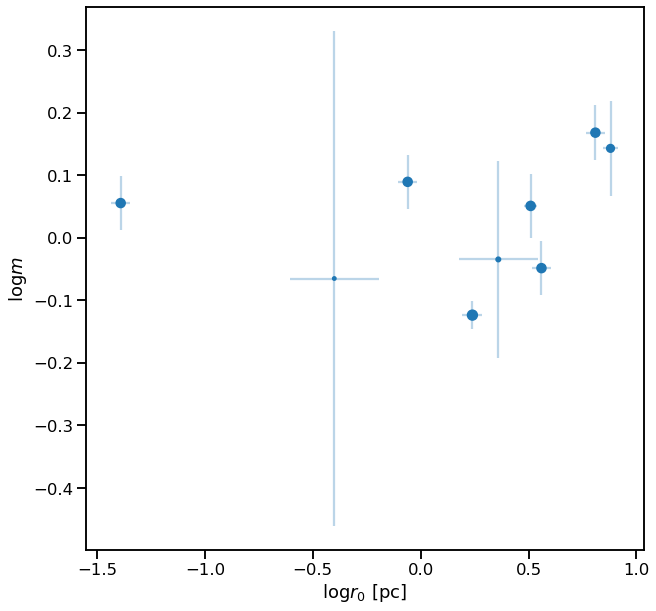

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log$ r_{0}$ [pc]", ylabel=r"log$ m$",
)
#ax.set_aspect("equal")
#sns.despine()

In [27]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [28]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00026855 1.00339469 1.11522353 1.0999662  1.01558472 1.04821532]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.01115576 1.00014747 1.05978493 1.00951141 1.00243985 1.0012884 ]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00212706 1.00091533 1.02448174 0.99886661 1.00188715 1.00448097]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99954897 0.99969111 1.01714453 1.00101825 1.00125594 1.00075313]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99897543 0.9992323  1.00375253 0.99921199 1.00012874 0.99871173]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.9989134  0.99862967 1


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99991903 0.99991824 0.99981182 1.00098505 0.99999953 0.99983731]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.9999289  0.99993119 0.99986027 1.00092291 0.99999954 0.99985533]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99994954 0.99990574 0.9998757  1.0009122  0.99999955 0.99990319]


In [29]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,0.090440,-0.030505,0.013140,"[0.5733340480410529, 0.42666595195894697]","[-0.9704388658094903, 0.5668761978550402]","[0.9870318299377157, 0.24726992114158808]",-0.479924,0.476869,0.244178,-0.314519,1.117822,-0.285125
1,0.094400,0.040920,0.022397,"[0.30668809152515364, 0.6933119084748464]","[-0.12747147545440707, 0.4596058112961255]","[2.3601894516870394, 0.11913105610494751]",-0.408810,0.283578,1.311841,0.279556,0.937935,0.248418
2,0.096760,0.002430,0.007145,"[0.282882021660028, 0.717117978339972]","[-1.3244885287781243, 0.41284415692706405]","[55.02449967707825, 0.36058080440306395]",-0.059233,0.551460,2.095562,-0.078616,4.054173,0.115777
3,0.125274,-0.040740,0.022640,"[0.2645756023926557, 0.7354243976073443]","[-0.9749833454079678, 0.2752464601061265]","[0.7128349806305329, 0.15954095633086024]",-0.361522,0.660913,0.444240,-0.055534,0.781066,-0.206908
4,0.042177,-0.039132,0.077095,"[0.21178604779715976, 0.7882139522028402]","[-0.8422391671313214, 0.37764848697865544]","[0.6479540620092938, 0.28169668876975046]",-0.568746,0.226942,0.503295,0.119293,0.779539,-0.109209
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.074954,-0.032326,0.014946,"[0.24687118061595514, 0.753128819384045]","[-0.597420513128408, 0.5030314428102951]","[0.6615259806881439, 0.2525081056833488]",-0.101043,0.308352,0.614742,0.231362,0.760683,-0.197187
9996,0.055797,-0.009967,0.049855,"[0.16159793337048067, 0.8384020666295192]","[0.27839783368974874, 0.46952265704031254]","[2.5335703209982117, 0.28424697887755507]",0.443284,0.436659,1.011771,0.438637,0.807887,-0.036039
9997,0.090991,0.120579,0.028104,"[0.1381736976657358, 0.861826302334264]","[-0.8171899259588218, 0.3597903329839121]","[0.7619167666706549, 0.7418157855794775]",-0.833811,0.578771,1.052728,0.197163,0.953706,0.565672
9998,-0.086738,-0.009747,0.102484,"[0.17915188351293068, 0.8208481164870693]","[-1.3888941889213913, -0.12023925484924944]","[0.33842728783869147, 0.2817939172652509]",-0.619263,0.414601,1.287770,-0.347521,0.727066,-0.022132


In [30]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.030781,0.020133,0.034009,0.171926,0.323646,0.595474,0.217076,1.335821,0.093280
std,0.071440,0.099851,0.059649,0.548319,0.205306,0.602899,0.280090,12.983248,0.401389
min,-0.741438,-0.787524,0.002282,-2.799178,0.001007,0.002235,-1.477435,0.325410,-0.999993
25%,-0.008463,-0.033686,0.012252,-0.152785,0.147840,0.204493,0.045775,0.663510,-0.195486
50%,0.031247,0.018710,0.020297,0.186377,0.289965,0.408266,0.223123,0.814915,0.108617
75%,0.069636,0.073884,0.036220,0.508915,0.484386,0.770011,0.395565,1.039826,0.392128
max,0.801746,1.011332,1.694268,2.522369,0.756197,8.101123,1.580352,790.490278,0.999951


In [31]:
pearsonr(X, Y)

(0.21701592376714263, 0.5748841059534728)

In [32]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,9.000000,9.000000,9.000000,9.000000
mean,0.167778,0.075479,0.026047,0.097396
std,0.710084,0.068464,0.099533,0.118274
min,-1.390000,0.031273,-0.123667,0.022790
25%,-0.060000,0.043395,-0.048565,0.043390
50%,0.360000,0.043404,0.050882,0.043396
75%,0.560000,0.046010,0.089340,0.076243
max,0.880000,0.207465,0.167967,0.394921


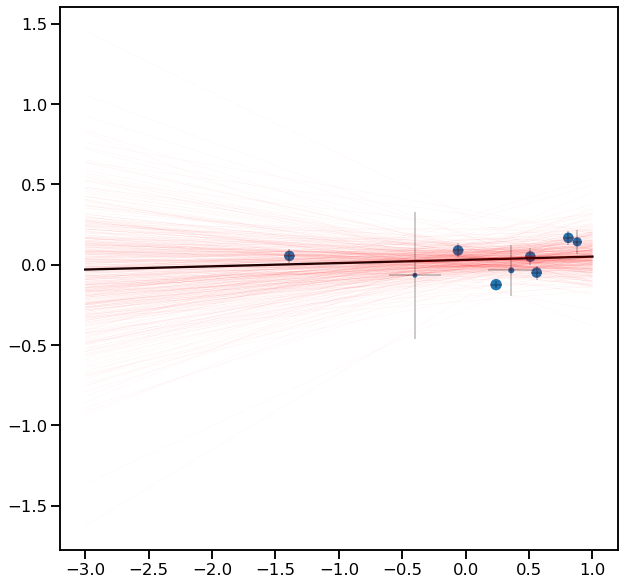

In [33]:
vmin, vmax = -3.0, 1.0
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

In [34]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(0.030781192960982088, 0.020133017435934947)

In [35]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.0714396026855238, 0.09985064284313606)

In [36]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.143
Method:                 Least Squares   F-statistic:                 0.0005274
Date:                Fri, 08 Oct 2021   Prob (F-statistic):              0.982
Time:                        07:36:11   Log-Likelihood:                 3.6963
No. Observations:                   9   AIC:                            -3.393
Df Residuals:                       7   BIC:                            -2.998
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0118      0.043     -0.275      

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Diam(R) vs r0

Sig Float

In [37]:
X, Y, Ye = [logdata[_] for _ in ['log L [pc]', 'log r0 [pc]', 'r0er']]

In [38]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:            log r0 [pc]   R-squared:                       0.990
Model:                            WLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     680.8
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           3.11e-08
Time:                        07:36:11   Log-Likelihood:                 9.1452
No. Observations:                   9   AIC:                            -14.29
Df Residuals:                       7   BIC:                            -13.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1831      0.062    -19.084      0.0

L vs sig

In [39]:
X, Y, Ye = [logdata[_] for _ in ['log L(H) [erg s^-1]', 'log sig [km/s]', 'siger']]

In [40]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:         log sig [km/s]   R-squared:                       0.487
Model:                            WLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     6.647
Date:                Fri, 08 Oct 2021   Prob (F-statistic):             0.0366
Time:                        07:36:11   Log-Likelihood:                -3.2803
No. Observations:                   9   AIC:                             10.56
Df Residuals:                       7   BIC:                             10.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -12.8836    

Distance (D) vs m

In [41]:
X, Y, Ye = [logdata[_] for _ in ['log Dist [kpc]', 'm', 'mer']]

In [42]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                 -0.141
Method:                 Least Squares   F-statistic:                  0.009264
Date:                Fri, 08 Oct 2021   Prob (F-statistic):              0.926
Time:                        07:36:11   Log-Likelihood:                -4.0773
No. Observations:                   9   AIC:                             12.15
Df Residuals:                       7   BIC:                             12.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9903      0.177      5.

sig vs siglos

In [43]:
X, Y, Ye = [logdata[_] for _ in ['log siglos [km/s]', 'log sig [km/s]', 'siger']]

In [44]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:         log sig [km/s]   R-squared:                       0.450
Model:                            WLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     5.732
Date:                Fri, 08 Oct 2021   Prob (F-statistic):             0.0479
Time:                        07:36:12   Log-Likelihood:                -3.5925
No. Observations:                   9   AIC:                             11.19
Df Residuals:                       7   BIC:                             11.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5759      0.82

L vs siglos

In [45]:
Moiseev=pd.read_csv('DataOthers//Moiseev2015.csv')
Ostin=pd.read_csv('DataOthers//Ostin2001.csv')
Blasco=pd.read_csv('DataOthers//Blasco2013.csv')
Rozas=pd.read_csv('DataOthers//Rozas2006.csv')
Ars=pd.read_csv('DataOthers//ArsRoy1986.csv')
Wis=pd.read_csv('DataOthers//Wis2012.csv')
Gal=pd.read_csv('DataOthers//Gallagher1983.csv')

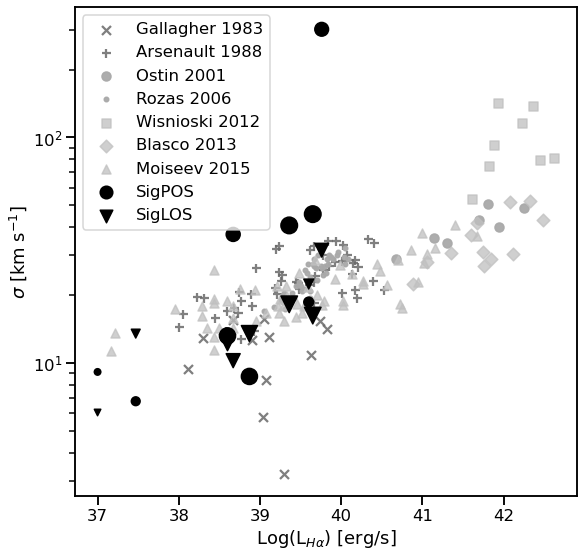

In [46]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Gal.L,Gal.sig,label='Gallagher 1983',marker='x',alpha=0.85,color='dimgray')
plt.scatter(Ars.L,10**Ars.sig,label='Arsenault 1988',marker='+',alpha=0.85,color='dimgray')
plt.scatter(Ostin.L,Ostin.sig,label='Ostin 2001',marker='o',alpha=0.95,color='darkgray')
plt.scatter(Rozas.L,10**(Rozas.sig),label='Rozas 2006',marker='.',alpha=0.95,color='darkgray')
plt.scatter(Wis.L,Wis.sig,label='Wisnioski 2012',marker='s',alpha=0.75,color='silver')
plt.scatter(Blasco.L,Blasco.sig,label='Blasco 2013',marker='D',alpha=0.75,color='silver')
plt.scatter(Moiseev.L,Moiseev.sig,label='Moiseev 2015',marker='^',alpha=0.75,color='silver')

plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')


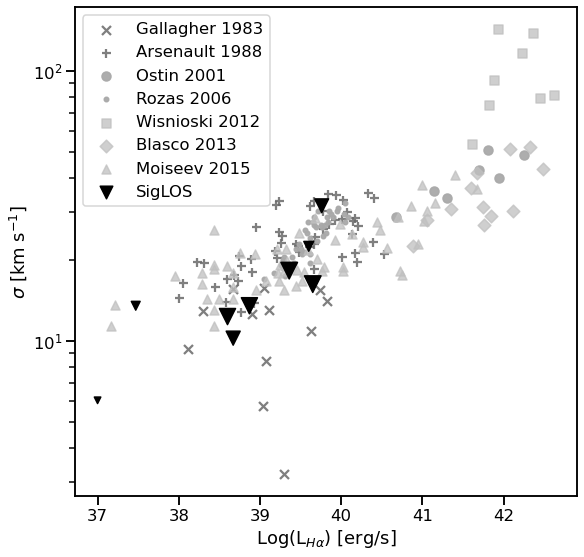

In [47]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Gal.L,Gal.sig,label='Gallagher 1983',marker='x',alpha=0.85,color='dimgray')
plt.scatter(Ars.L,10**Ars.sig,label='Arsenault 1988',marker='+',alpha=0.85,color='dimgray')
plt.scatter(Ostin.L,Ostin.sig,label='Ostin 2001',marker='o',alpha=0.95,color='darkgray')
plt.scatter(Rozas.L,10**(Rozas.sig),label='Rozas 2006',marker='.',alpha=0.95,color='darkgray')
plt.scatter(Wis.L,Wis.sig,label='Wisnioski 2012',marker='s',alpha=0.75,color='silver')
plt.scatter(Blasco.L,Blasco.sig,label='Blasco 2013',marker='D',alpha=0.75,color='silver')
plt.scatter(Moiseev.L,Moiseev.sig,label='Moiseev 2015',marker='^',alpha=0.75,color='silver')

#plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')

In [48]:
globalL= pd.concat([Moiseev.L, Ostin.L.dropna(),Blasco.L.dropna(),Rozas.L.dropna(),Ars.L.dropna(),Wis.L.dropna(),Gal.L.dropna()], axis=0)
globalS= pd.concat([Moiseev.sig, Ostin.sig.dropna(),Blasco.sig.dropna(),10**Rozas.sig.dropna(),10**Ars.sig.dropna(),Wis.sig.dropna(),Gal.sig.dropna()],  axis=0)
GL=np.concatenate((np.array(globalL), np.array(logdata['log L(H) [erg s^-1]'])))
GS=np.concatenate((np.array(globalS), np.array(10**(logdata['log siglos [km/s]']))))

[Text(0, 0.5, 'Log$σ$ [km s$^{-1}$]'), Text(0.5, 0, 'Log(L$_{Hα}$) [erg/s]')]

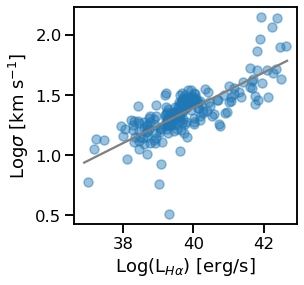

In [49]:
fig, ax=plt.subplots(figsize=(4,4))


plt.scatter(GL, np.log10(GS),alpha=0.45)

x2=np.logspace(1.567,1.63)
y2=-4.4928+0.1472*x2
plt.plot(x2,y2, color='gray')

ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='Log$σ$ [km s$^{-1}$]')


In [50]:
GSer = (GS*.05)/GS

In [51]:
GLer = (GL*.05)/GL

In [52]:
X, Xe, Y, Ye = [GL, GLer, np.log10(GS), GSer]

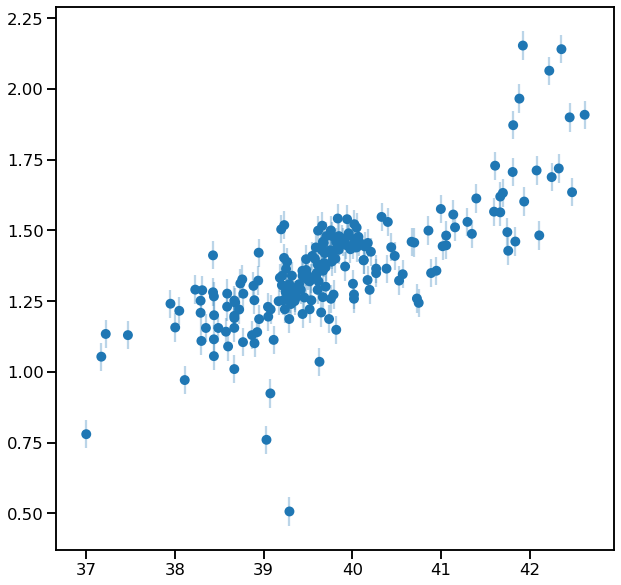

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
#plt.xscale('log')
#plt.yscale('log')

In [54]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [55]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00855538 1.00848213 1.00258566 0.99790495 0.99289915 0.99058209]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.01616429 1.01588183 0.99732973 1.0102056  0.9989773  1.00606144]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00909468 1.00893889 1.00167042 1.00280093 0.99932995 1.00495484]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00506592 1.00503711 1.00454582 1.00302812 0.99840077 1.00542323]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00093429 1.00089436 1.00105198 1.00668279 0.99936529 0.9994582 ]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00064591 1.00066279 1


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00009082 1.0000834  0.99985491 1.0024107  0.99997582 1.00007472]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00008576 1.00007803 0.99985768 1.00222626 0.99995171 1.00006727]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00015737 1.00014808 0.999843   1.00203401 0.99992958 1.00006197]


In [56]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,-3.984060,0.134161,0.017223,"[0.9305305716220965, 0.06946942837790337]","[39.50214843088861, 41.91637391391795]","[0.5566448167953056, 0.12025445556822151]",40.695738,1.106994,0.725203,39.669863,0.950317,0.696815
1,-3.864114,0.131356,0.012948,"[0.8872767083794849, 0.11272329162051507]","[39.44743462665226, 41.87991961363175]","[0.7246688767920755, 0.09230753882381218]",41.046857,0.854367,0.291029,39.721632,1.115878,0.789914
2,-4.173111,0.139133,0.014121,"[0.8901669523543408, 0.10983304764565921]","[39.54487293382043, 41.81462494856488]","[0.6048732688849583, 0.12880694872766055]",40.266950,0.752861,0.429377,39.794167,1.027751,0.769091
3,-4.638983,0.150878,0.017553,"[0.8714468566400372, 0.12855314335996282]","[39.45828289712352, 41.81312689895495]","[0.6650164930714197, 0.21302081811534165]",40.437724,0.614942,0.083578,39.761005,1.108212,0.783775
4,-4.033072,0.135830,0.019331,"[0.8729661381494039, 0.12703386185059612]","[39.521021580158724, 41.74278100368815]","[0.6103494569867529, 0.16206646977581973]",39.286897,1.416118,0.619285,39.803260,1.049195,0.715781
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-3.990764,0.135056,0.015747,"[0.8224132208883396, 0.17758677911166057]","[39.443015361425346, 41.75162640607932]","[0.48576054280888137, 0.2434383559100356]",40.293324,0.875543,0.291963,39.852994,1.105046,0.765393
9996,-4.596014,0.149751,0.015168,"[0.8475500515026083, 0.15244994849739177]","[39.42725854928736, 41.751162200885155]","[0.6714613152854841, 0.3294017502948765]",41.180227,1.116137,0.336752,39.781538,1.147655,0.812833
9997,-4.593562,0.149710,0.014280,"[0.8640573011608857, 0.1359426988391143]","[39.40985728690452, 41.858878599255135]","[0.5747601030213025, 0.23069846842219344]",41.869121,1.152745,0.856547,39.742784,1.110176,0.811925
9998,-4.237796,0.140432,0.014230,"[0.8670339038237883, 0.1329660961762116]","[39.493530785533956, 41.87183501340493]","[0.4989254815880925, 0.20026665935293983]",40.209821,0.831717,0.401788,39.809765,1.054187,0.778668


In [57]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-4.416990,0.145341,0.015415,40.064062,0.733540,0.709058,39.762299,1.095855,0.787334
std,0.342151,0.008601,0.001827,0.750353,0.488052,0.557560,0.078085,0.065233,0.030575
min,-5.627436,0.109735,0.009961,36.365640,0.002637,0.004931,39.483651,0.871584,0.627345
25%,-4.647204,0.139508,0.014127,39.581652,0.306927,0.312083,39.710017,1.051033,0.767874
50%,-4.419589,0.145387,0.015315,39.945693,0.653064,0.565050,39.761791,1.092823,0.789482
75%,-4.185016,0.151132,0.016561,40.516442,1.113949,0.943553,39.813295,1.137072,0.808677
max,-2.993017,0.175743,0.027340,43.394142,1.786128,5.751106,40.069433,1.413033,0.881181


In [58]:
pearsonr(X, Y)

(0.767342157135229, 1.1862709253330849e-40)

In [59]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,203.000000,2.030000e+02,203.000000,2.030000e+02
mean,39.763694,5.000000e-02,1.362492,5.000000e-02
std,1.091324,4.185320e-17,0.206537,4.181617e-17
min,37.000000,5.000000e-02,0.506911,5.000000e-02
25%,39.177150,5.000000e-02,1.252853,5.000000e-02
50%,39.650000,5.000000e-02,1.349472,5.000000e-02
75%,40.157000,5.000000e-02,1.460000,5.000000e-02
max,42.622000,5.000000e-02,2.153357,5.000000e-02


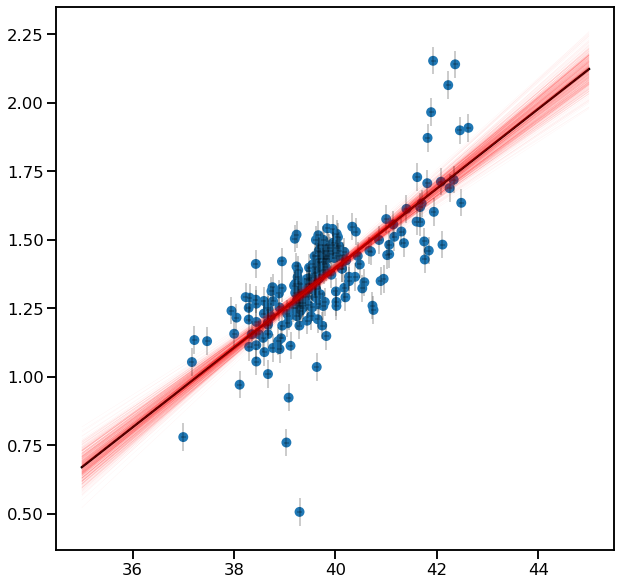

In [60]:
vmin, vmax = 35, 45
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

In [61]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(-4.416990473366307, 0.1453409311612282)

In [62]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.34215125389526924, 0.00860111425230284)

In [63]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            WLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     287.8
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           1.19e-40
Time:                        07:36:33   Log-Likelihood:                 122.85
No. Observations:                 203   AIC:                            -241.7
Df Residuals:                     201   BIC:                            -235.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4121      0.340    -12.958      0.0

In [64]:
Y, Ye, X, Xe = [GL, GLer, np.log10(GS), GSer]

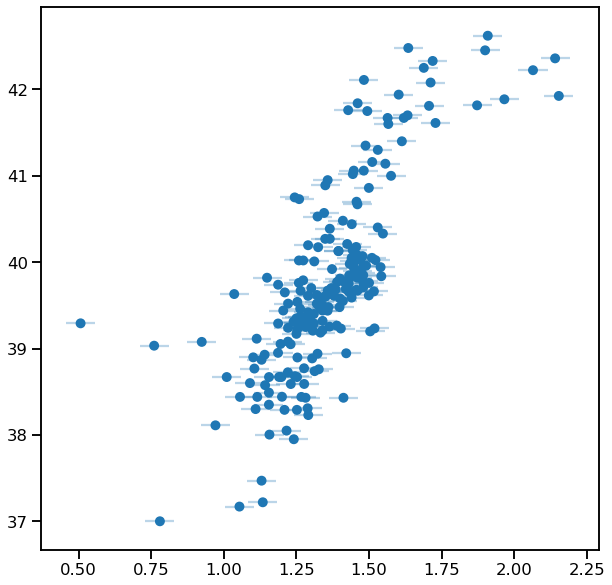

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

In [66]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [67]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00029826 0.99651286 1.01087239 0.99818984 1.00249166 1.00141832]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00373383 1.0011433  0.99742877 0.99946948 0.99744789 0.99646752]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00208878 1.00093357 0.9984567  1.00210559 0.99770211 0.99826732]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99860131 0.99807926 0.99840959 1.00132749 0.99973421 1.00044903]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99892237 0.99877013 0.99852945 1.00377494 0.99969366 0.99892066]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99902969 0.9988133  0


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99979202 0.99979602 1.00003588 1.00040616 0.99982338 0.99989801]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99980011 0.99980379 0.99998759 1.00034122 0.99984402 0.99990304]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99980945 0.99981689 0.99998435 1.00038072 0.99984796 0.99990379]


In [68]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,33.854369,4.415380,0.469189,"[0.9009018646237277, 0.09909813537627236]","[1.3534862068533415, 1.6016059677402692]","[0.024304462360469112, 0.1899547147347529]",1.468072,0.037424,0.022477,1.378074,0.214980,0.810911
1,33.932788,4.298058,0.467582,"[0.939364112264214, 0.060635887735785966]","[1.3309856473355173, 1.4696207962273324]","[0.020089298714167522, 0.3501685831428359]",1.373168,0.029821,0.138112,1.339392,0.202975,0.787043
2,33.832294,4.320231,0.400793,"[0.8894360550725079, 0.11056394492749205]","[1.346387840969158, 1.6000369694083416]","[0.018348550866692466, 0.09199264512806928]",1.396726,0.032548,0.094493,1.374432,0.181157,0.777480
3,32.925660,4.954439,0.418805,"[0.8591449674381672, 0.14085503256183293]","[1.3385925883982877, 1.5430956655759829]","[0.012506049805644485, 0.2174371021451697]",1.450370,0.058155,0.077643,1.367398,0.215482,0.855153
4,33.385940,4.713736,0.449613,"[0.8438500626284461, 0.15614993737155397]","[1.3299058175723435, 1.5887325633989173]","[0.014242165813392417, 0.12191790335861769]",2.010419,0.052911,0.040604,1.370322,0.199707,0.814499
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34.320473,4.000246,0.613159,"[0.20424096419532908, 0.795759035804671]","[1.5327558946875317, 1.3339460782974215]","[0.1702177012349133, 0.016695399843878023]",1.504364,0.021958,0.024615,1.374551,0.233399,0.766199
9996,33.930191,4.259194,0.555509,"[0.20806216769822086, 0.791937832301779]","[1.48854636488009, 1.3509514978472548]","[0.10966382802193152, 0.013910451086659005]",1.332999,0.050634,0.054939,1.379580,0.192231,0.739487
9997,33.491768,4.593410,0.404288,"[0.1560878193690866, 0.8439121806309136]","[1.3969393698761214, 1.3532069998207976]","[0.16526448101556862, 0.014232053814610127]",1.276550,0.019687,0.043120,1.360033,0.195085,0.815554
9998,34.074901,4.221333,0.493330,"[0.19494183840193466, 0.8050581615980654]","[1.2882366725181078, 1.3567946788743284]","[0.17654814659994475, 0.01402444119714957]",1.460758,0.015980,0.029367,1.343430,0.215510,0.791541


In [69]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.968988,4.253155,0.471767,1.385875,0.022671,0.037310,1.360322,0.205108,0.782728
std,0.363951,0.264443,0.052012,0.110299,0.016139,0.028790,0.014627,0.019513,0.037526
min,32.535311,3.288760,0.310298,0.822674,0.000168,0.000360,1.303736,0.148175,0.615640
25%,33.722219,4.073491,0.436126,1.321815,0.009446,0.016526,1.350311,0.191935,0.758965
50%,33.969661,4.253970,0.468455,1.382505,0.018514,0.029965,1.360302,0.203321,0.784028
75%,34.215332,4.432229,0.504629,1.448027,0.033189,0.050403,1.369856,0.216576,0.809115
max,35.272604,5.300398,0.714338,2.010419,0.063969,0.258868,1.420700,0.331908,0.910946


In [70]:
pearsonr(X, Y)

(0.767342157135229, 1.1862709253330849e-40)

In [71]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,203.000000,2.030000e+02,203.000000,2.030000e+02
mean,1.362492,5.000000e-02,39.763694,5.000000e-02
std,0.206537,4.181617e-17,1.091324,4.185320e-17
min,0.506911,5.000000e-02,37.000000,5.000000e-02
25%,1.252853,5.000000e-02,39.177150,5.000000e-02
50%,1.349472,5.000000e-02,39.650000,5.000000e-02
75%,1.460000,5.000000e-02,40.157000,5.000000e-02
max,2.153357,5.000000e-02,42.622000,5.000000e-02


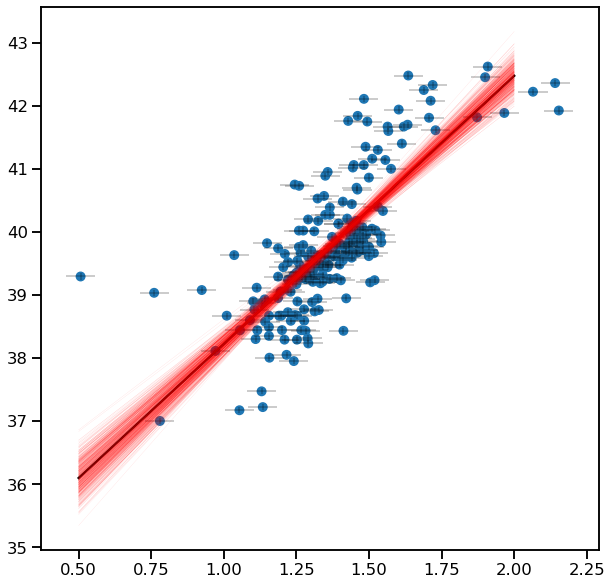

In [72]:
vmin, vmax = 0.5, 2
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.4, lw=0.1)


In [73]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(33.96898791021462, 4.253154875846043)

In [74]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.3639505147956182, 0.26444317986980487)

In [75]:
print("--- %s seconds ---" % (time.time()-start_time))


--- 66.88259601593018 seconds ---
